This notebook analyses the MISO Daily Forecast and Actual Load (DFAL) data for 2021.

In [1]:
import os, sys
sys.path.append(os.getcwd().replace("/docs","/source"))
import miso

Load the actual load data and index it by zone.

In [2]:
dfal = miso.Zone("2021-01-01","2021-12-31","df_al",types="Actual",values="LOAD")
data = dfal.dataframe()
data.reset_index(inplace=True)
data.set_index(["Zone","Datetime"],inplace=True)
data

Value
Zone Datetime                     
LRZ1 2021-01-01 00:00:00  11176.03
     2021-01-01 01:00:00  10807.00
     2021-01-01 02:00:00  10583.73
     2021-01-01 03:00:00  10476.40
     2021-01-01 04:00:00  10437.02
...                            ...
MISO 2021-12-31 19:00:00  78860.49
     2021-12-31 20:00:00  77067.63
     2021-12-31 21:00:00  75094.78
     2021-12-31 22:00:00  72841.81
     2021-12-31 23:00:00  69787.30

[61320 rows x 1 columns]

Plot the zone loads.

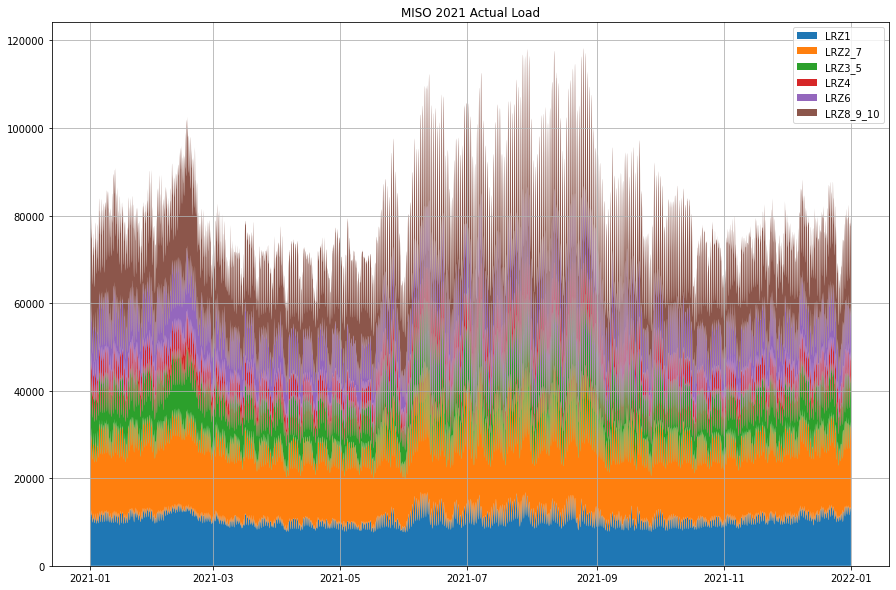

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
zones = data.drop(index="MISO",level=0)
values = []
labels = list(zones.index.get_level_values(0).unique())
index = zones.index.get_level_values(1).unique()
for zone in labels:
    values.append(zones.loc[zone].transpose().values.tolist()[0])
plt.stackplot(index,values,labels=labels)
plt.grid()
plt.legend()
plt.title("MISO 2021 Actual Load");